In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import documents as docs
import comparisons 
import comparisonsmachine as machine 
import random
import time
import utils

start = time.time()

data_folder = "data"
results_folder = "results"
para_sep = "###"

dd = comparisons.DuplicationDetection(thresh_jaccard = .5, thresh_same_sent = .9, thresh_same_doc = .25)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))

display(article_df.head(2))
print("Setup time: %d seconds" % np.round(time.time() - start))

,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,wsbtv.com,2018-07-16T01:02:26-04:00,True,https://www.wsbtv.com/news/local/cobb-county/p...,"Police: Missing teen with autism found, reunit...","Police: Missing teen with autism found, reunit...","{'wordCounts': {'1533': 10, '367': 3, '2619': ...",NaN,None,0.0
1,1,wn.com,2018-07-16T04:51:37-04:00,False,https://wn.com/Apostolic_Constitutions,Apostolic s,Apostolic Constitutions ### back to playlist #...,"{'wordCounts': {'147633': 5, '5029': 6, '546':...",NaN,None,0.0


Setup time: 3 seconds


In [2]:
n = 20
start = time.time()
#sample = random.sample(list(article_df["id"]), n)
sample = [i for i in range(n)]#f article_df.loc[i, "event"] == 1]
print("n articles: ", len(sample)) #, sample)
article_dict = dd.dict_by_ids(article_df, sample, para_sep = para_sep, parser = "spacy")
elapsed = round(time.time() - start, 2)
print("Time taken to run cell: %f s (%f s per document)" % (elapsed, elapsed/n))


20
Time taken to run cell: 4.490000 s (0.224500 s per document)


In [3]:
sim_mat = dd.similarity_mat(article_dict)

0 of 20 rows completed, 0.00m elapsed


In [4]:
dd.cluster_articles(sim_mat)
dd.prop_unique_clusters()

0.95

In [6]:
comparer = machine.MultiComparisons()
article_dict = comparer.dict_by_ids(article_df, sample)
sim_mat_mp = comparer.run(article_dict)

Loaded documents via multiprocessing, 1.35m elapsed
0 of 190 comparisons made, 0.00m elapsed
Finished document comparisons via multiprocessing, 0.03m elapsed


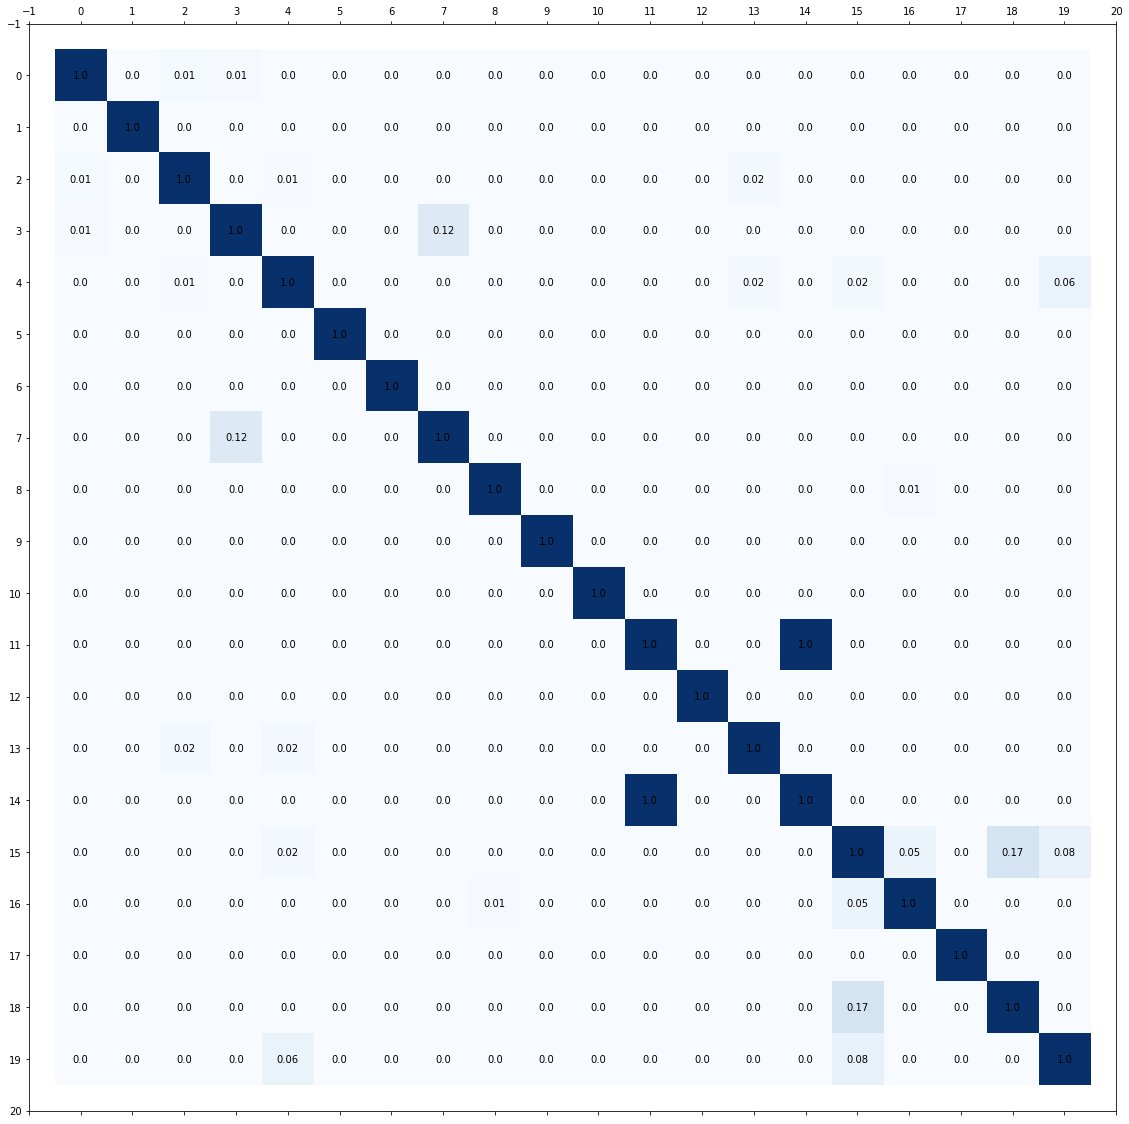

In [8]:
utils.display_mat(utils.subsetmat(sim_mat, [i for i in range(20)]))

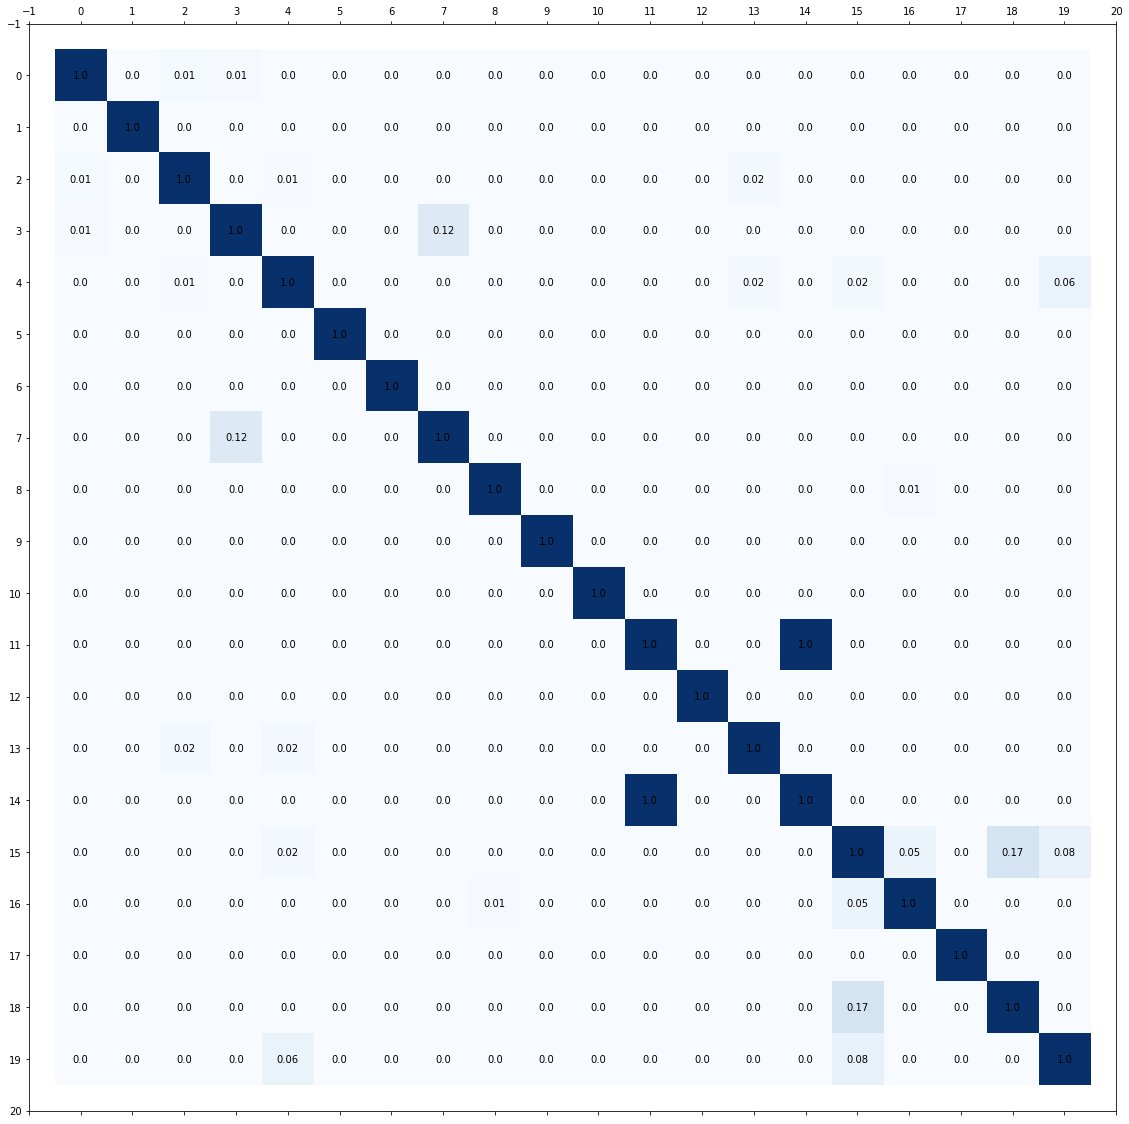

In [9]:
utils.display_mat(utils.subsetmat(sim_mat_mp, [i for i in range(20)]))